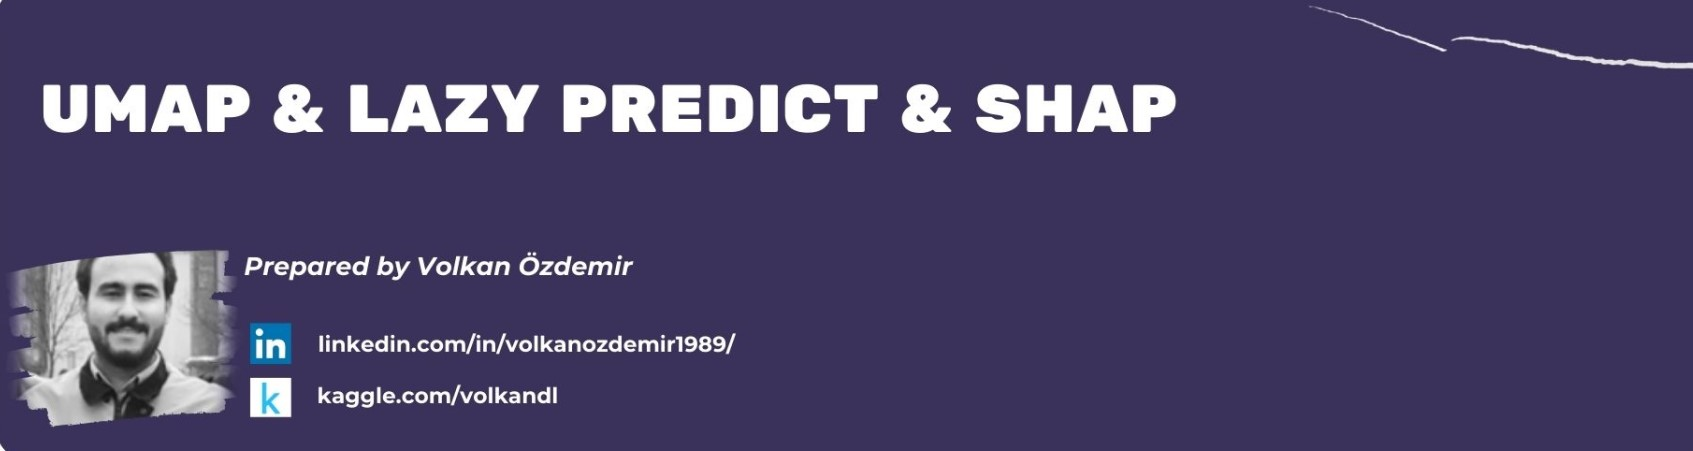

**Welcome!!**

This notebook contains the usage of the interesting libraries such:

* pandas_profiling

* UMAP

* Lazy Predict

* SHAP

So you can use that notebook as a source to apply those awesome libs to your work! UPVOTE if you like


## $\color{orange}{\text{Table of Contents}}$

* [Chapter 1. PANDAS PROFILING REPORT](#chapter1)     
* [Chapter 2. UMAP ](#chapter2)
* [Chapter 3. LAZY PREDICT](#chapter3)
* [Chapter 4. SHAP](#chapter4)


## $\color{Pink}{\text{Introduction}}$ 

In [ ]:
import numpy as np 
import pandas as pd 
import os
import warnings
import plotly
from plotly.offline import iplot
warnings.filterwarnings("ignore")
import sklearn
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)



In [ ]:
path = r"../input/breast-cancer-wisconsin-data/data.csv"

In [ ]:
data = pd.read_csv(path)
data.head()
print("data shape is {}".format(data.shape))

In [ ]:
data=data.iloc[:,1:-1]
data.dtypes

In [ ]:
data.isnull().sum()

In [ ]:
y= data["diagnosis"]
y.value_counts()

## $\color{Pink}{\text{Chapter 1. PANDAS PROFILING REPORT}}$ <a class="anchor" id="chapter1"></a>

Pandas-profiling is an open-source Python library that allows us to quickly do exploratory analysis. It is simple and by 1 line code every thing is done! Be careful for large datasets, it takes ages.

source : https://github.com/pandas-profiling/pandas-profiling

In [ ]:
pp.ProfileReport(data)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

le.fit(y)
y = le.transform(y)
y.shape

In [ ]:
X=data.iloc[:,1:]
X.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
sxc = StandardScaler()
X = sxc.fit_transform(X)
X.shape

## $\color{Pink}{\text{Chapter 2. UMAP}}$ <a class="anchor" id="chapter2"></a>

UMAP is a general purpose manifold learning and dimension reduction algorithm. It is designed to be compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines.

source: https://umap-learn.readthedocs.io/

In [ ]:
import umap
embedding = umap.UMAP(n_neighbors=8,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], 
            c=y, 
            edgecolor='none', 
            alpha=0.80, 
            s=56)
plt.axis('off');

## $\color{Pink}{\text{Chapter 3. LAZY PREDICT}}$ <a class="anchor" id="chapter3"></a>

Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning. For classification you may use LazyClassifier(), for regression you may use LazyRegressor()

source: https://lazypredict.readthedocs.io/en/latest/

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X , y, test_size=0.2)

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
models

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X, y)

## $\color{Pink}{\text{Chapter 4. SHAP}}$ <a class="anchor" id="chapter4"></a>

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.

source : https://shap.readthedocs.io/en

In [ ]:
!pip install shap
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.bar(shap_values)

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [ ]:
shap.dependence_plot("Feature 13", shap_values, X_train)

In [ ]:
shap.dependence_plot("Feature 23", shap_values, X_train)

In [ ]:
shap.dependence_plot("Feature 27", shap_values, X_train)

## Thanks. **UPVOTE** if you like!!